In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Second Chance,1950
1,One Exciting Week,1946
2,Flowers (IV),2011
3,Stuntman,1968
4,Kaki kuda,1958


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

<AxesSubplot:xlabel='year'>

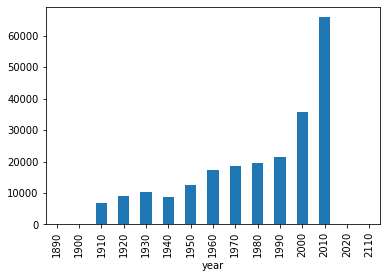

In [14]:
titles.groupby((titles.year//10)*10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

<AxesSubplot:xlabel='year'>

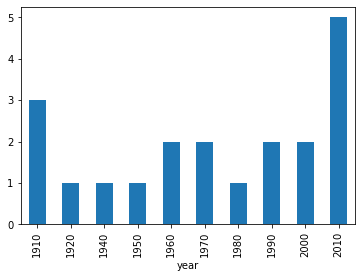

In [16]:
titles[titles.title=="Hamlet"].groupby((titles.year//10)*10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [75]:
cast[(cast.n==1) & (cast.year//10 == 195)].groupby(['year','type']).size().unstack()


type,actor,actress
year,,
1950,622,287
1951,640,283
1952,605,300
1953,648,305
1954,616,311
1955,634,281
1956,651,304
1957,700,303
1958,674,292


### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [76]:
cast[(cast.n>=1) & (cast.n<=5) & (cast.year//10 == 195)].groupby(['year','type','n']).size().unstack()

n             1.0  2.0  3.0  4.0  5.0
year type                            
1950 actor    622  439  504  534  560
     actress  287  412  320  270  226
1951 actor    640  453  556  574  574
     actress  283  426  294  254  258
1952 actor    605  434  538  526  543
     actress  300  439  301  280  231
1953 actor    648  457  564  563  559
     actress  305  456  309  279  262
1954 actor    616  408  534  521  510
     actress  311  473  280  249  237
1955 actor    634  423  552  540  532
     actress  281  450  301  278  259
1956 actor    651  475  548  542  539
     actress  304  431  303  298  257
1957 actor    700  469  586  572  573
     actress  303  489  319  307  275
1958 actor    674  475  563  543  552
     actress  292  455  326  300  264
1959 actor    692  487  544  564  551
     actress  319  465  356  305  262

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [78]:
cast[cast.title=="The Pink Panther"].groupby(['year'])['n'].max()

year
1963    15.0
2006    50.0
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [80]:
cast[cast.name=="Frank Oz"].sort_values('year').groupby(['year','title']).size()

year  title                                         
1979  The Muppet Movie                                  8
1980  Star Wars: Episode V - The Empire Strikes Back    1
      The Blues Brothers                                1
1981  The Great Muppet Caper                            6
1982  The Dark Crystal                                  2
1983  Star Wars: Episode VI - Return of the Jedi        1
      Superman III                                      1
      Trading Places                                    1
1984  The Muppets Take Manhattan                        7
1985  Follow That Bird                                  3
      Spies Like Us                                     1
1986  Labyrinth                                         1
1992  The Muppet Christmas Carol                        7
1996  Muppet Treasure Island                            4
1998  Blues Brothers 2000                               1
1999  Muppets from Space                                4
      Star Wars: Ep

### List each of the characters that Frank Oz has portrayed at least twice.

In [81]:
x=cast[cast.name=="Frank Oz"].groupby('character').size()
x[x>=2].sort_values(ascending=False)

character
Yoda              6
Animal            6
Sam the Eagle     5
Miss Piggy        5
Cookie Monster    5
Fozzie Bear       4
Bert              3
Grover            2
dtype: int64